In [137]:
import pandas as pd
df = pd.read_csv('Dissertation_dataset.csv')


missing_values = df.isnull().sum()
print("Missing values per column before cleaning:")
print(missing_values)
df_cleaned = df.dropna()

missing_values_after = df_cleaned.isnull().sum()
print("\nMissing values per column after cleaning:")
print(missing_values_after)

df_cleaned.to_csv('/Users/jonathan/cleaned_Dissertation_dataset.csv', index=False)


Missing values per column before cleaning:
track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_name            5
track_album_release_date    0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

Missing values per column after cleaning:
track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_name            0
track_album_release_date    0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
l

In [138]:
df_cleaned = df_cleaned.drop_duplicates()


In [139]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardization
scaler = StandardScaler()
df_cleaned[['danceability', 'energy', 'tempo']] = scaler.fit_transform(df_cleaned[['danceability', 'energy', 'tempo']])

# Normalization
normalizer = MinMaxScaler()
df_cleaned[['danceability', 'energy', 'tempo']] = normalizer.fit_transform(df_cleaned[['danceability', 'energy', 'tempo']])


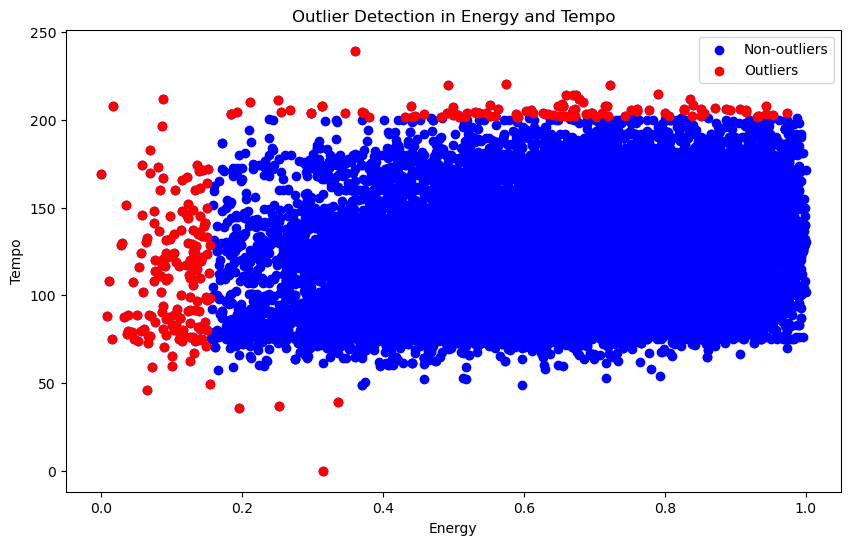

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('Dissertation_dataset.csv')

z_threshold = 3

df['z_energy'] = np.abs(stats.zscore(df['energy']))
df['z_tempo'] = np.abs(stats.zscore(df['tempo']))

df_outliers = df[(df['z_energy'] > z_threshold) | (df['z_tempo'] > z_threshold)]

plt.figure(figsize=(10, 6))
plt.scatter(df['energy'], df['tempo'], color='blue', label='Non-outliers')
plt.scatter(df_outliers['energy'], df_outliers['tempo'], color='red', label='Outliers')

plt.xlabel('Energy')
plt.ylabel('Tempo')
plt.title('Outlier Detection in Energy and Tempo')
plt.legend()

plt.show()


/var/folders/29/9cgw2krx3cjczf8r_3mszr280000gn/T/ipykernel_10762/2881234400.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/29/9cgw2krx3cjczf8r_3mszr280000gn/T/ipykernel_10762/2881234400.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



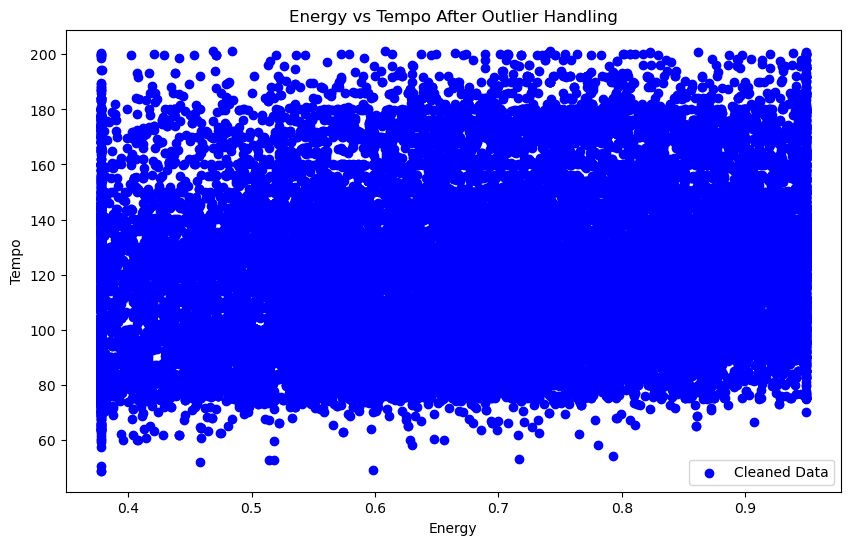

In [140]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

df = pd.read_csv('Dissertation_dataset.csv')
z_threshold = 3
df['z_energy'] = np.abs(stats.zscore(df['energy']))
df['z_tempo'] = np.abs(stats.zscore(df['tempo']))
df_cleaned = df[(df['z_energy'] <= z_threshold) & (df['z_tempo'] <= z_threshold)]

upper_cap_energy = df_cleaned['energy'].quantile(0.95)
lower_cap_energy = df_cleaned['energy'].quantile(0.05)

df_cleaned['energy'] = np.where(df_cleaned['energy'] > upper_cap_energy, upper_cap_energy, df_cleaned['energy'])
df_cleaned['energy'] = np.where(df_cleaned['energy'] < lower_cap_energy, lower_cap_energy, df_cleaned['energy'])
output_file_path = '/Users/jonathan/cleaned_dataset.csv' 
df_cleaned.to_csv(output_file_path, index=False)

plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['energy'], df_cleaned['tempo'], color='blue', label='Cleaned Data')
plt.xlabel('Energy')
plt.ylabel('Tempo')
plt.title('Energy vs Tempo After Outlier Handling')
plt.legend()
plt.show()


In [141]:
song_count_after_cleaning = df_cleaned.shape[0]
print(f"Number of songs after removing outliers: {song_count_after_cleaning}")


Number of songs after removing outliers: 32550


In [142]:
from scipy import stats
import numpy as np

columns_to_check = ['danceability', 'loudness','acousticness']  

z_threshold = 3
for column in columns_to_check:
    df[f'z_{column}'] = np.abs(stats.zscore(df[column]))

condition = np.ones(df.shape[0], dtype=bool) 
for column in columns_to_check:
    condition = condition & (df[f'z_{column}'] <= z_threshold)

df_cleaned = df[condition]

song_count_after_cleaning = df_cleaned.shape[0]
print(f"Number of songs after removing outliers: {song_count_after_cleaning}")

Number of songs after removing outliers: 31825


In [19]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

columns_to_check = ['acousticness', 'danceability', 'loudness'] 

for column in columns_to_check:
    outliers = detect_outliers_iqr(df, column)
    print(f"Outliers in {column}:\n", outliers)

    

Outliers in acousticness:
                      track_id  \
387    3gMJMSrU2QETbsILNuybIh   
403    7Bh4dzYrbYtXbbuvK8M8yE   
475    5MaDeMdqsPsZTxNWdEZPVH   
577    5OJJF2HA089n5T0ugmXCrk   
689    3ZCTVFBt2Brf31RLEnCkWJ   
...                       ...   
31629  0oR9XRneKUIefSfy5y0IJ8   
31982  2WFOLhpZmDGhl1xmwIIZrJ   
32013  4r0q8fMOqR3Y3pUptDTsnT   
32044  5NiuxHp2iXSwj0iaQU7TpH   
32556  3TSZpRzSEKL1dFfpd1JDoF   

                                              track_name        track_artist  \
387                                  Make A Move - Pt. 2         EMMA WAHLIN   
403                       New Shoes - feat.Shun Murakami                phai   
475                                         Starry Night             Mamamoo   
577                                              Shy Guy      Campsite Dream   
689                                  everything i wanted       Billie Eilish   
...                                                  ...                 ...   
31629           

In [143]:

df_cleaned = df.copy()
for column in columns_to_check:
    df_cleaned = df_cleaned[np.abs(stats.zscore(df_cleaned[column])) <= z_threshold]

song_count_after_cleaning = df_cleaned.shape[0]
print(f"Number of songs after removing outliers: {song_count_after_cleaning}")


Number of songs after removing outliers: 31699


In [145]:
#Date handling
import pandas as pd

def fix_date_format(date_str):
    if len(date_str) == 4:  
        return f'01/01/{date_str}'  
    elif len(date_str) == 7:  
        return f'01/{date_str[5:7]}/{date_str[:4]}'  
    return date_str  

df_cleaned['track_album_release_date'] = df_cleaned['track_album_release_date'].apply(fix_date_format)

df_cleaned['track_album_release_date'] = pd.to_datetime(df_cleaned['track_album_release_date'], format='%d/%m/%Y')

print(df_cleaned[['track_album_release_date']].head())


  track_album_release_date
0               2019-06-14
1               2019-12-13
2               2019-07-05
3               2019-07-19
4               2019-03-05


In [146]:
#Duplicate ID's
df_cleaned['track_id'].value_counts()[df['track_id'].value_counts()>1]

track_id
7BKLCZ1jbUBVqRi2FVlTVw    10
3eekarcy7kvN4yt5ZFzltW     9
14sOS5L36385FJ3OL8hew4     9
2tnVG71enUj33Ic2nFN6kZ     8
6oJ6le65B3SEqPwMRNXWjY     8
                          ..
0HLpIMwRnkDSn55nAhscB9     2
1gZ7i4qxXkHZb1r6eioaAP     2
41X9To0bQ4fpoSRri4NHiI     2
2y4lAQpi5VTNLu2ldeTdUH     2
6JV2JOEocMgcZxYSZelKcc     2
Name: count, Length: 3095, dtype: int64

In [147]:
duplicated_ids = df[df.duplicated(subset=['track_id'], keep=False)]

print("Duplicated track IDs:")
print(duplicated_ids[['track_id']].drop_duplicates())

Duplicated track IDs:
                     track_id
0      6f807x0ima9a1j3VPbc7VN
1      0r7CVbZTWZgbTCYdfa2P31
2      1z1Hg7Vb0AhHDiEmnDE79l
5      7fvUMiyapMsRRxr07cU8Ef
7      6b1RNvAcJjQH73eZO4BLAB
...                       ...
30798  3rwdcyPQ37SSsf1loOpux9
30885  0rCuRc07y6l1kPYj0JSRg5
30899  1nas007nDbzLwDGwvMdz79
30910  0jPU39bL0SrCmYc1RwbFkX
31016  2sApUgcQQL2m0quuYgq0ec

[3166 rows x 1 columns]


In [148]:

df_cleaned_no_duplicates = df_cleaned.drop_duplicates(subset='track_id', keep='first')

print(f"Number of rows after removing duplicates: {df_cleaned_no_duplicates.shape[0]}")


Number of rows after removing duplicates: 27331


In [149]:
#Tracks with missing info
missing_values = df_cleaned_no_duplicates.isnull().sum()

print("Missing values per column:")
print(missing_values)

missing_track_info = df_cleaned_no_duplicates[df_cleaned_no_duplicates['track_name'].isnull() | df_cleaned_no_duplicates['track_artist'].isnull() | df_cleaned_no_duplicates['track_id'].isnull()]

print("Rows with missing track information:")
print(missing_track_info)


Missing values per column:
track_id                    0
track_name                  4
track_artist                4
track_popularity            0
track_album_name            4
track_album_release_date    0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
z_energy                    0
z_tempo                     0
z_danceability              0
z_loudness                  0
z_acousticness              0
dtype: int64
Rows with missing track information:
                     track_id track_name track_artist  track_popularity  \
8151   69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   
9282   5cjecvX0CmC9gK0Laf5EMQ        NaN          NaN

In [150]:
df_cleaned_no_missing = df_cleaned_no_duplicates.dropna(subset=['track_name', 'track_artist', 'track_id'])

print(f"Number of rows after removing missing track information: {df_cleaned_no_missing.shape[0]}")


Number of rows after removing missing track information: 27327


In [151]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [152]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from sklearn.metrics.pairwise import cosine_similarity
dataset = 'dataset_cleaned (1).csv'  

In [153]:
from datetime import datetime

def calculate_weighted_popularity(track_album_release_date):
    release_date = datetime.strptime(track_album_release_date, '%Y-%m-%d')
    
    time_span = datetime.now() - release_date
    
    weight = 1 / (time_span.days + 1)  
    
    return weight


In [154]:
scaler = MinMaxScaler()
music_features = df[['z_energy', 'z_tempo', 'z_danceability', 
                           'z_loudness', 'z_acousticness', 'mode', 'key',
                           'valence']].values
music_features_scaled = scaler.fit_transform(music_features)

In [155]:
def content_based_recommendations(input_song_name, num_recommendations=5):
    if input_song_name not in df['track_name'].values:
        print(f"'{input_song_name}' not found in the dataset. Please enter a valid song name.")
        return

    input_song_index = df[df['track_name'] == input_song_name].index[0]

    similarity_scores = cosine_similarity([music_features_scaled[input_song_index]], music_features_scaled)

    similar_song_indices = similarity_scores.argsort()[0][::-1][1:num_recommendations + 1]

    content_based_recommendations = df.iloc[similar_song_indices][['track_name', 'track_artist', 'track_album_name', 'track_album_release_date', 'track_popularity']]

    return content_based_recommendations

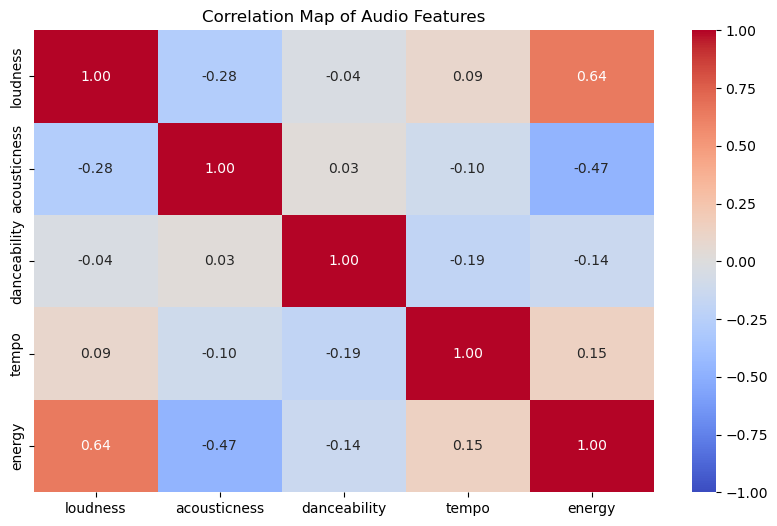

None


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
file_path = 'dataset_cleaned (1).csv'
df = pd.read_csv(file_path)

features = ['loudness', 'acousticness', 'danceability', 'tempo', 'energy']

correlation_matrix = df[features].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)

plt.title('Correlation Map of Audio Features')
plt.show()


In [156]:
pip install dash


Note: you may need to restart the kernel to use updated packages.


In [157]:
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')
df['year'] = df['track_album_release_date'].dt.year


/var/folders/29/9cgw2krx3cjczf8r_3mszr280000gn/T/ipykernel_10762/3350599409.py:1: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [158]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

df = pd.read_csv('dataset_cleaned (1).csv')

features = ['z_danceability', 'z_energy', 'z_acousticness', 'z_loudness', 'z_tempo']
X = df[features]
y = df['track_popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)


LinearRegression()

In [159]:

import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
import joblib
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX

df = pd.read_csv('dataset_cleaned (1).csv')

X_train = df[['z_loudness', 'z_acousticness', 'z_danceability', 'z_tempo', 'z_energy']].values
y_train = df['track_popularity'].values

model = LinearRegression()
model.fit(X_train, y_train)

joblib.dump(model, 'popularity_model.pkl')
model_xgb = joblib.load('best_xgb_regressor.pkl')
scaler_reg = joblib.load('scaler_regeressor.pkl')
scaler_class = joblib.load('scaler_classifier.pkl')
label_encoder = joblib.load('label_encoder.pkl')

features = ['loudness', 'acousticness', 'danceability', 'tempo', 'energy']

df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')
df['year'] = df['track_album_release_date'].dt.year
grouped_df = df.groupby(['year', 'playlist_genre']).agg({'track_popularity': 'mean'}).reset_index()
grouped_df = df[['year', 'playlist_genre', 'track_popularity'] + features]

df['decade'] = (df['year'] // 10) * 10

unique_genres = df['playlist_genre'].dropna().unique()
top_genres = df['playlist_genre'].value_counts().nlargest(6).index

df['mode_label'] = df['mode'].map({1: 'Major', 0: 'Minor'})
app = dash.Dash(__name__, suppress_callback_exceptions=True)

app.layout = html.Div(
    style={
        'backgroundColor': '#000000', 'color': '#FFFFFF', 'padding': '20px', 
        'display': 'flex', 'flexDirection': 'column'
    },
    children=[
        html.Div(
            style={'display': 'flex', 'flexWrap': 'wrap', 'width': '100%', 'flex': '1', 'marginBottom': '30px'},
            children=[
        
                html.Div(
                    style={'flex': '1', 'padding': '10px', 'textAlign': 'center', 'marginBottom': '30px'},
                    children=[
                        html.H2("Select Mood", style={'color': '#FFD700'}),
                        html.Div(
                            children=[
                                html.Button('Happy', id='happy-button', style={'backgroundColor': '#FFD700', 'color': '#000', 'margin': '5px', 'padding': '10px'}),
                                html.Button('Sad', id='sad-button', style={'backgroundColor': '#1E90FF', 'color': '#000', 'margin': '5px', 'padding': '10px'}),
                                html.Button('Relaxed', id='relaxed-button', style={'backgroundColor': '#32CD32', 'color': '#000', 'margin': '5px', 'padding': '10px'}),
                                html.Button('Energetic', id='energetic-button', style={'backgroundColor': '#FF4500', 'color': '#000', 'margin': '5px', 'padding': '10px'})
                            ],
                            style={'display': 'flex', 'justifyContent': 'center'}
                        )
                    ]
                ),

                html.Div(
                    style={'flex': '1', 'padding': '10px', 'maxHeight': '500px', 'overflowY': 'auto', 'marginBottom': '30px'},
                    children=[
                        html.H2("Filters", style={'textAlign': 'center', 'color': '#FFD700'}),
                        html.Label("Genre:", style={'color': '#FFFFFF'}),
                        dcc.Dropdown(
                            id='genre-dropdown',
                            options=[{'label': genre, 'value': genre} for genre in unique_genres],
                            placeholder="Select a genre",
                            style={'marginBottom': '20px', 'color': '#333333', 'backgroundColor': '#FFFFFF', 'font-family': 'Arial'}
                        ),
                        html.Label("Decade:", style={'color': '#FFFFFF'}),
                        dcc.Dropdown(
                            id='decade-dropdown',
                            options=[{'label': f"{decade}s", 'value': decade} for decade in [1960, 1970, 1980, 1990, 2000, 2010, 2020]],
                            placeholder="Select a decade",
                            style={'marginBottom': '20px', 'color': '#333333', 'backgroundColor': '#FFFFFF', 'font-family': 'Arial'}
                        )
                    ]
                ),

                
                html.Div(
                    style={'flex': '2', 'padding': '10px', 'maxHeight': '500px', 'overflowY': 'auto', 'marginBottom': '30px'},
                    children=[
                        html.H2("Top 10 Most Popular Tracks", style={'textAlign': 'center', 'color': '#FFD700'}),
                        html.Div(id='top-10-tracks-container'),
                        html.Div(id='additional-suggestions-container', style={'marginTop': '20px'})
                    ]
                ),

                
                html.Div(
                    style={'flex': '2', 'padding': '10px', 'marginBottom': '30px'},
                    children=[
                        html.H2("Popularity by Year", style={'textAlign': 'center', 'color': '#FFD700'}),
                        dcc.Graph(
                            id='popularity-line-chart',
                            figure=px.line(
                                df.groupby(['year', 'playlist_genre'], as_index=False).agg({'track_popularity': 'mean'}),
                                x='year', 
                                y='track_popularity', 
                                color='playlist_genre', 
                                title='Popularity by Year',
                                line_shape='spline', markers=True
                            ).update_traces(opacity=0.7).update_layout(paper_bgcolor='black', plot_bgcolor='black', font_color='white')
                        )
                    ]
                )
            ]
        ),

        
        html.Div(
            style={'display': 'flex', 'width': '100%', 'flexDirection': 'row', 'padding': '10px', 'marginBottom': '30px'},
            children=[
                
                html.Div(
                    style={'flex': '1', 'padding': '10px', 'maxWidth': '50%', 'marginBottom': '30px'},
                    children=[
                        html.H2("Genre Distribution", style={'textAlign': 'center', 'color': '#FFD700'}),
                        dcc.Graph(
                            id='genre-pie-chart',
                            figure=px.pie(
                                df[df['playlist_genre'].isin(top_genres)],
                                names='playlist_genre',
                                title='Genre Distribution',
                                hole=0.3
                            ).update_traces(textinfo='percent+label').update_layout(
                                paper_bgcolor='black', plot_bgcolor='black', font_color='white', showlegend=True
                            )
                        )
                    ]
                ),

                
                html.Div(
                    style={'flex': '1', 'padding': '10px', 'maxWidth': '50%', 'marginBottom': '30px'},
                    children=[
                        dcc.Graph(id='line-chart-acousticness-tempo')
                    ]
                )
            ]
        ),

        
        html.Div(
            style={'backgroundColor': '#000000', 'color': '#FFFFFF', 'padding': '20px', 'display': 'flex', 'flexDirection': 'column', 'marginBottom': '40px'},
            children=[
                html.H1("Song Genre Prediction", style={'textAlign': 'center', 'color': '#FFD700'}),

                
                html.Div(
                    children=[
                        html.Label("danceability:", style={'marginBottom': '10px'}),
                        dcc.Slider(id='danceability-slider', min=0, max=1, step=0.1, value=0, marks={i/10: f'{i/10}' for i in range(0, 11)}, tooltip={"placement": "bottom", "always_visible": True}),
                        html.Br(),
                        html.Label("energy:", style={'marginBottom': '10px'}),
                        dcc.Slider(id='energy-slider', min=0, max=1, step=0.1, value=0, marks={i/10: f'{i/10}' for i in range(0, 11)}, tooltip={"placement": "bottom", "always_visible": True}),
                        html.Br(),
                        html.Label("loudness:", style={'marginBottom': '10px'}),
                        dcc.Slider(id='loudness-slider', min=-15, max=1.5, step=0.1, value=0, marks={i: f'{i}' for i in [-15, -10, -5, 0, 1.5]}, tooltip={"placement": "bottom", "always_visible": True}),
                        html.Br(),
                        html.Label("speechiness:", style={'marginBottom': '10px'}),
                        dcc.Slider(id='speechiness-slider', min=0, max=1, step=0.1, value=0, marks={i/10: f'{i/10}' for i in range(0, 11)}, tooltip={"placement": "bottom", "always_visible": True}),
                        html.Br(),
                        html.Label("acousticness:", style={'marginBottom': '10px'}),
                        dcc.Slider(id='acousticness-slider', min=0, max=1, step=0.1, value=0, marks={i/10: f'{i/10}' for i in range(0, 11)}, tooltip={"placement": "bottom", "always_visible": True}),
                        html.Br(),
                        html.Label("valence:", style={'marginBottom': '10px'}),
                        dcc.Slider(id='valence-slider', min=0, max=1, step=0.1, value=0, marks={i/10: f'{i/10}' for i in range(0, 11)}, tooltip={"placement": "bottom", "always_visible": True}),
                        html.Br(),
                        html.Label("tempo:", style={'marginBottom': '10px'}),
                        dcc.Slider(
                        id='tempo-slider', 
                        min=100, 
                        max=200, 
                        step=0.1, 
                        value=0, 
                        marks={i: {'label': f'{i}', 'style': {'color': '#FFFFFF', 'fontSize': '14px'}} for i in range(100, 201, 10)}, 
                        tooltip={"placement": "bottom", "always_visible": True}
),
                        html.Br(),

                    ],
                    style={'width': '80%', 'margin': '0 auto'}
                ),

                
                html.Div([
                    html.Button('Predict Genre', id='predict-button', n_clicks=0, style={'marginTop': '20px', 'padding': '10px 20px'})
                ], style={'textAlign': 'center'}),

                                
                html.Div(id='predicted-genre', style={'marginTop': '20px', 'textAlign': 'center', 'fontSize': '24px'}),
            ]
        ),

        
        html.H1("Genre Popularity Forecasts", style={'textAlign': 'center', 'color': '#FFD700', 'marginTop': '40px', 'fontSize': '30px'}),

        
        html.Div(
            style={'display': 'flex', 'justifyContent': 'space-between', 'marginTop': '30px'},
            children=[
                html.Img(src='/assets/timeseries.png', style={'width': '30%', 'margin': '10px'}),
                html.Img(src='/assets/rock.png', style={'width': '30%', 'margin': '10px'}),
                html.Img(src='/assets/rap.png', style={'width': '30%', 'margin': '10px'}),
            ]
        ),

        
        html.Div(
            style={'display': 'flex', 'justifyContent': 'space-between', 'marginTop': '30px'},
            children=[
                html.Img(src='/assets/edm.png', style={'width': '30%', 'margin': '10px'}),
                html.Img(src='/assets/latin.png', style={'width': '30%', 'margin': '10px'}),
                html.Img(src='/assets/rnb.png', style={'width': '30%', 'margin': '10px'}),
            ]
        ),
        html.Div(
            style={
                'margin': '0 auto',  
                'width': '60%',  
                'padding': '20px'
            },
            children=[
                html.H2("Correlation Matrix", style={'textAlign': 'center', 'color': '#FFD700'}),
                dcc.Graph(id='correlation-matrix')
            ]       
        )

        
    ]
)

    




def filter_by_mood(mood):
    if mood == 'Happy':
        return df[(df['valence'] > 0.6) & (df['energy'] > 0.5)]
    elif mood == 'Sad':
        return df[(df['valence'] < 0.4) & (df['energy'] < 0.5)]
    elif mood == 'Relaxed':
        return df[(df['valence'] > 0.4) & (df['energy'] < 0.4)]
    elif mood == 'Energetic':
        return df[(df['valence'] > 0.5) & (df['energy'] > 0.7)]
    else:
        return df

@app.callback(
    [Output('top-10-tracks-container', 'children'),
     Output('additional-suggestions-container', 'children')],
    [Input('happy-button', 'n_clicks'),
     Input('sad-button', 'n_clicks'),
     Input('relaxed-button', 'n_clicks'),
     Input('energetic-button', 'n_clicks'),
     Input('genre-dropdown', 'value'),
     Input('decade-dropdown', 'value')]
)
def update_top_10_tracks(happy_clicks, sad_clicks, relaxed_clicks, energetic_clicks, selected_genre, selected_decade):
    ctx = dash.callback_context
    if not ctx.triggered:
        return "Select a mood or filter by genre/decade to view the top 10 tracks.", ""

    
    button_id = ctx.triggered[0]['prop_id'].split('.')[0]

    
    if button_id in ['happy-button', 'sad-button', 'relaxed-button', 'energetic-button']:
        if button_id == 'happy-button':
            mood = 'Happy'
        elif button_id == 'sad-button':
            mood = 'Sad'
        elif button_id == 'relaxed-button':
            mood = 'Relaxed'
        else:
            mood = 'Energetic'

        
        filtered_df = filter_by_mood(mood)
        top_10_tracks = filtered_df.sort_values(by='track_popularity', ascending=False).head(10)

        
        top_10_list = html.Ul(
            children=[
                html.Li(f"{row['track_name']} by {row['track_artist']} (Popularity: {row['track_popularity']})")
                for _, row in top_10_tracks.iterrows()
            ],
            style={'listStyleType': 'none', 'padding': '0', 'margin': '0'}
        )
        return top_10_list, ""  
    
    elif selected_genre and selected_decade:
        
        filtered_df = df[(df['playlist_genre'] == selected_genre) & (df['decade'] == selected_decade)]

        
        top_10_tracks = filtered_df.sort_values(by='track_popularity', ascending=False).head(10)

        
        top_10_list = html.Ul(
            children=[
                html.Li(f"{row['track_name']} by {row['track_artist']} (Popularity: {row['track_popularity']})")
                for _, row in top_10_tracks.iterrows()
            ],
            style={'listStyleType': 'none', 'padding': '0', 'margin': '0'}
        )

        
        if len(top_10_tracks) < 10:
            
            additional_suggestions_df = df[(df['playlist_genre'] == selected_genre) &
                                           (~df['track_name'].isin(top_10_tracks['track_name']))]

            
            if not additional_suggestions_df.empty:
                suggested_tracks = additional_suggestions_df.sort_values(by='track_popularity', ascending=False).head(10)
                additional_suggestions = html.Div(
                    children=[
                        html.H4("Songs You Might Like", style={'color': '#FFFFFF'}),
                        html.Ul(
                            children=[
                                html.Li(f"{row['track_name']} by {row['track_artist']} (Popularity: {row['track_popularity']})")
                                for _, row in suggested_tracks.iterrows()
                            ],
                            style={'listStyleType': 'none', 'padding': '0', 'margin': '0'}
                        )
                    ]
                )

        return top_10_list, additional_suggestions

    return "Please select both a genre and a decade or choose a mood.", ""

@app.callback(
    Output('line-chart-acousticness-tempo', 'figure'),
    Input('genre-pie-chart', 'clickData')
)
def update_line_chart(clickData):
    
    print(clickData)

    
    if clickData is None:
        return px.line()

    
    selected_genre = clickData['points'][0]['label']
    
    
    filtered_df = df[df['playlist_genre'] == selected_genre]
    
    
    genre_data = filtered_df.groupby('year').agg({'z_loudness': 'mean', 'z_tempo': 'mean'}).reset_index()
    
    
    fig = px.line(genre_data, x='year', y=['z_loudness', 'z_tempo'],
                  title=f'Loudness and Tempo over Time for {selected_genre}',
                  labels={'value': 'Average Loudness/Tempo', 'year': 'Year'},
                  markers=True)
    
    return fig

@app.callback(
    Output('predicted-genre', 'children'),
    [Input('predict-button', 'n_clicks')],
    [Input('danceability-slider', 'value'),
     Input('energy-slider', 'value'),
     Input('loudness-slider', 'value'),
     Input('speechiness-slider', 'value'),
     Input('acousticness-slider', 'value'),
     Input('valence-slider', 'value'),
     Input('tempo-slider', 'value')]
)
def predict_genre(n_clicks, danceability, energy, loudness, speechiness, acousticness, valence, tempo):
    if n_clicks > 0:
        
        features = [[danceability, energy, loudness, speechiness, acousticness, valence, tempo]]
        scaled_features = scaler_class.transform(features)
        
        model_rf = joblib.load('rf_classifier_model.pkl')
        predicted_genre = model_rf.predict(scaled_features)[0]
        if np.isscalar(predicted_genre):
            predicted_genre = np.array([predicted_genre])
        predicted_genre_true = label_encoder.inverse_transform(predicted_genre)

        return f"Predicted Genre {predicted_genre_true[0]} "
    else:
        return "Adjust the sliders and click 'Predict Genre' to see the result."

    
    fig.update_layout(
        paper_bgcolor='black',
        plot_bgcolor='black',
        font_color='white',
        legend_title_text='Metric',
        xaxis_title='Year',
        yaxis_title='Average Loudness/Tempo',
        legend=dict(
            orientation="h",  
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        )
    )

    return fig


@app.callback(
    Output('correlation-matrix', 'figure'),
    [Input('genre-dropdown', 'value')]
)
def update_correlation_matrix(selected_genre):
    
    genre_df = df[df['playlist_genre'] == selected_genre]

    
    corr_matrix = genre_df[features].corr()

    
    fig = go.Figure(data=go.Heatmap(
        z=corr_matrix.values,
        x=corr_matrix.columns,
        y=corr_matrix.columns,
        text=np.round(corr_matrix.values, 2), 
        texttemplate="%{text}",  
        colorscale='RdBu',
        zmin=-1, zmax=1
    ))

    fig.update_layout(
        title=f'Select a genre to see its Correlation Matrix : {selected_genre}', 
        xaxis_title="Features", 
        yaxis_title="Features",
        paper_bgcolor='black',  
        plot_bgcolor='black',
        font=dict(color='#FFD700')  
    )

    return fig





if __name__ == '__main__':
    app.run_server(debug=True, port=8052)


/var/folders/29/9cgw2krx3cjczf8r_3mszr280000gn/T/ipykernel_10762/151773458.py:28: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



None
{'points': [{'curveNumber': 0, 'label': 'latin', 'color': '#19d3f3', 'value': 4017, 'percent': 0.14687922775969872, 'v': 4017, 'bbox': {'x0': 342.0188098866692, 'x1': 425.1977511810024, 'y0': 913.9188640556213, 'y1': 997.0978053499545}, 'pointNumbers': [14236, 14237, 14238, 14239, 14240, 14241, 14242, 14243, 14244, 14245, 14246, 14247, 14248, 14249, 14250, 14251, 14252, 14253, 14254, 14255, 14256, 14257, 14258, 14259, 14260, 14261, 14262, 14263, 14264, 14265, 14266, 14267, 14268, 14269, 14270, 14271, 14272, 14273, 14274, 14275, 14276, 14277, 14278, 14279, 14280, 14281, 14282, 14283, 14284, 14285, 14286, 14287, 14288, 14289, 14290, 14291, 14292, 14293, 14294, 14295, 14296, 14297, 14298, 14299, 14300, 14301, 14302, 14303, 14304, 14305, 14306, 14307, 14308, 14309, 14310, 14311, 14312, 14313, 14314, 14315, 14316, 14317, 14318, 14319, 14320, 14321, 14322, 14323, 14324, 14325, 14326, 14327, 14328, 14329, 14330, 14331, 14332, 14333, 14334, 14335, 14336, 14337, 14338, 14339, 14340, 14341,